In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [28]:
import pathlib

df = pd.DataFrame()
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

# For every csv file in folder 
for csv in pathlib.Path('./Temp Load Data/').glob('*.csv'):
    print("Loading dataset: "+csv.stem)
    temp_df = pd.read_csv(csv,
                          parse_dates=['Date'],
                          dayfirst=True,
                          date_parser=dateparse)
    temp_df['Country'] = csv.stem #set cokumn with the name of the dataset this datum came from
    df = pd.concat([df,temp_df]) 
print('Data loading complete!')

# sort values based on Start column (Datetime)
df.sort_values(by=['Date'], ascending=True, inplace=True)

Loading dataset: Austria
Loading dataset: Belgium
Loading dataset: Bulgaria
Loading dataset: Croatia
Loading dataset: Czechia
Loading dataset: Denmark
Loading dataset: Estonia
Loading dataset: Finland
Loading dataset: France
Loading dataset: Germany
Loading dataset: Greece
Loading dataset: Hungary
Loading dataset: Ireland
Loading dataset: Italy
Loading dataset: Latvia
Loading dataset: Lithuania
Loading dataset: Netherlands
Loading dataset: Norway
Loading dataset: Poland
Loading dataset: Portugal
Loading dataset: Romania
Loading dataset: Serbia
Loading dataset: Slovakia
Loading dataset: Slovenia
Loading dataset: Spain
Loading dataset: Sweden
Loading dataset: Switzerland
Loading dataset: Ukraine
Data loading complete!


In [29]:
df

Date     Load   Country
0     2015-04-09 23:00:00   6401.0   Austria
0     2015-04-09 23:00:00  27602.0     Spain
0     2015-04-09 23:00:00   1296.0  Slovenia
0     2015-04-09 23:00:00   3081.0  Slovakia
0     2015-04-09 23:00:00   6513.0   Romania
...                   ...      ...       ...
61148 2022-04-01 01:00:00  17926.0    Poland
61154 2022-04-01 01:00:00  16203.0    Norway
61154 2022-04-01 01:00:00    668.0    Latvia
61154 2022-04-01 01:00:00   3600.0   Denmark
61154 2022-04-01 01:00:00   9606.0   Finland

[1577954 rows x 3 columns]

In [30]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

# create columns for datetime parsing + weekday/weekend and if date is holiday 
df['Time'] = df['Date'].dt.time
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Date'].dt.hour
# df['Minute'] = df['Date'].dt.minute
# df['Second'] = df['Date'].second
df["Weekday"] = df['Date'].dt.weekday
df["Weekend"] = df['Date'].dt.weekday >= 5
df['Holiday'] = df['Date'].dt.date.astype('datetime64').isin(calendar().holidays())

df.to_csv("df_eda_out.csv")

df.loc[df['Holiday']==True]

Date     Load   Country      Time  Year  Month  Day  \
1081  2015-05-25 00:00:00   4934.0  Portugal  00:00:00  2015      5   25   
1081  2015-05-25 00:00:00   3457.0   Hungary  00:00:00  2015      5   25   
1081  2015-05-25 00:00:00   7316.0   Finland  00:00:00  2015      5   25   
1081  2015-05-25 00:00:00  23507.0     Spain  00:00:00  2015      5   25   
1081  2015-05-25 00:00:00  11831.0    Norway  00:00:00  2015      5   25   
...                   ...      ...       ...       ...   ...    ...  ...   
60240 2022-02-21 23:00:00   4457.0   Denmark  23:00:00  2022      2   21   
60240 2022-02-21 23:00:00   5670.0   Hungary  23:00:00  2022      2   21   
60240 2022-02-21 23:00:00   1655.0  Slovenia  23:00:00  2022      2   21   
60240 2022-02-21 23:00:00  32269.0     Italy  23:00:00  2022      2   21   
60240 2022-02-21 23:00:00   3306.0  Slovakia  23:00:00  2022      2   21   

       Hour  Minute  Weekday  Weekend  Holiday  
1081      0       0        0    False     True  
1081      0       0        0    False     True  
1081      0       0        0    False     True  
1081      0       0        0    False     True  
1081      0       0        0    False     True  
...     ...     ...      ...      ...      ...  
60240    23       0        0    False     True  
60240    23       0        0    False     True  
60240    23       0        0    False     True  
60240    23       0        0    False     True  
60240    23       0        0    False     True  

[44184 rows x 12 columns]

In [4]:
#  debug cell: check if all countries have been added
print(len(df['Dataset'].unique()))
print(df['Dataset'].unique())

df.tail()

42
['Austria, APG CA  MBA' 'DK2 BZ  MBA' 'Belgium, Elia BZ  CA  MBA'
 'Estonia, Elering BZ  CA  MBA' 'Finland, Fingrid BZ  CA  MBA'
 'France, RTE BZ  CA  MBA' 'Slovenia, ELES BZ  CA  MBA'
 'Greece, IPTO BZ  CA MBA' 'Hungary, MAVIR CA  BZ  MBA'
 'Romania, Transelectrica BZ  CA  MBA' 'Ireland (SEM) BZ  MBA'
 'SE1 BZ  MBA' 'Slovakia, SEPS BZ  CA  MBA' 'IT-Centre-North BZ'
 'IT-Centre-South BZ' 'IT-North BZ' 'IT-Sardinia BZ' 'IT-Sicily BZ'
 'NO5 BZ  MBA' 'SE2 BZ  MBA' 'NO4 BZ  MBA' 'NO3 BZ  MBA' 'NO2 BZ  MBA'
 'SE3 BZ  MBA' 'Spain, REE BZ  CA  MBA' 'NO1 BZ  MBA'
 'Lithuania, Litgrid BZ  CA  MBA' 'Latvia, AST BZ  CA  MBA' 'SE4 BZ  MBA'
 'Switzerland, Swissgrid BZ  CA  MBA' 'Czech Republic, CEPS BZ  CA  MBA'
 'IT-South BZ' 'Netherlands, TenneT NL BZ  CA MBA' 'DK1 BZ  MBA'
 'Portugal, REN BZ  CA  MBA' 'Poland, PSE SA BZ  BZA  CA  MBA'
 'Bulgaria, ESO BZ  CA  MBA' 'Serbia, EMS BZ  CA  MBA'
 'Croatia, HOPS BZ  CA  MBA' 'DE-LU MBA' 'Ukraine IPS CTA'
 'Ukraine BEI CTA']


Start     Load   Price  \
61154 2022-04-01 01:00:00+00:00  10822.0  159.90   
61105 2022-04-01 01:00:00+00:00   1282.0   94.48   
60943 2022-04-01 01:00:00+00:00   3440.0   66.61   
61073 2022-04-01 01:00:00+00:00   9606.0   94.48   
46162 2022-04-01 01:00:00+00:00   3509.0  114.16   

                                 Dataset      Country        Date      Time  \
61154  Netherlands, TenneT NL BZ  CA MBA  Netherlands  2022-04-01  01:00:00   
61105                        SE1 BZ  MBA       Sweden  2022-04-01  01:00:00   
60943                        NO3 BZ  MBA       Norway  2022-04-01  01:00:00   
61073       Finland, Fingrid BZ  CA  MBA      Finland  2022-04-01  01:00:00   
46162            Serbia, EMS BZ  CA  MBA       Serbia  2022-04-01  01:00:00   

       Year  Month  Day  Hour  Minute  Weekday  Weekend  Holiday  
61154  2022      4    1     1       0        4    False    False  
61105  2022      4    1     1       0        4    False    False  
60943  2022      4    1     1       0        4    False    False  
61073  2022      4    1     1       0        4    False    False  
46162  2022      4    1     1       0        4    False    False

In [5]:
# list(df.columns):
print("NaN values in dataframe: "+str(df.isnull().sum().sum()))

NaN values in dataframe: 0


In [6]:
# Basic statistics of dataset
df.describe()

Load         Price          Year         Month           Day  \
count  2.478999e+06  2.478999e+06  2.478999e+06  2.478999e+06  2.478999e+06   
mean   7.530733e+03  7.499279e+01  2.018273e+03  6.520528e+00  1.576414e+01   
std    1.103439e+04  1.975181e+02  2.036484e+00  3.460473e+00  8.792633e+00   
min    0.000000e+00 -5.000000e+02  2.015000e+03  1.000000e+00  1.000000e+00   
25%    2.001500e+03  2.993000e+01  2.017000e+03  3.000000e+00  8.000000e+00   
50%    4.116000e+03  4.292000e+01  2.018000e+03  7.000000e+00  1.600000e+01   
75%    7.663000e+03  6.075000e+01  2.020000e+03  1.000000e+01  2.300000e+01   
max    2.258930e+05  6.101780e+03  2.022000e+03  1.200000e+01  3.100000e+01   

               Hour        Minute       Weekday  
count  2.478999e+06  2.478999e+06  2.478999e+06  
mean   1.150831e+01  1.311554e+00  2.998932e+00  
std    6.918740e+00  6.511961e+00  1.999834e+00  
min    0.000000e+00  0.000000e+00  0.000000e+00  
25%    6.000000e+00  0.000000e+00  1.000000e+00  
50%    1.200000e+01  0.000000e+00  3.000000e+00  
75%    1.800000e+01  0.000000e+00  5.000000e+00  
max    2.300000e+01  4.500000e+01  6.000000e+00

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2478999 entries, 0 to 46162
Data columns (total 15 columns):
 #   Column   Dtype              
---  ------   -----              
 0   Start    datetime64[ns, UTC]
 1   Load     float64            
 2   Price    float64            
 3   Dataset  object             
 4   Country  object             
 5   Date     object             
 6   Time     object             
 7   Year     int64              
 8   Month    int64              
 9   Day      int64              
 10  Hour     int64              
 11  Minute   int64              
 12  Weekday  int64              
 13  Weekend  bool               
 14  Holiday  bool               
dtypes: bool(2), datetime64[ns, UTC](1), float64(2), int64(6), object(4)
memory usage: 269.5+ MB


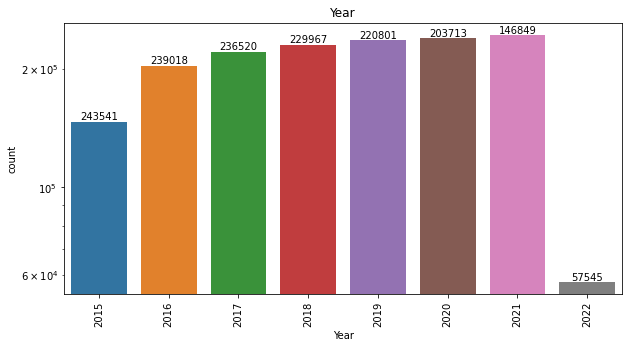

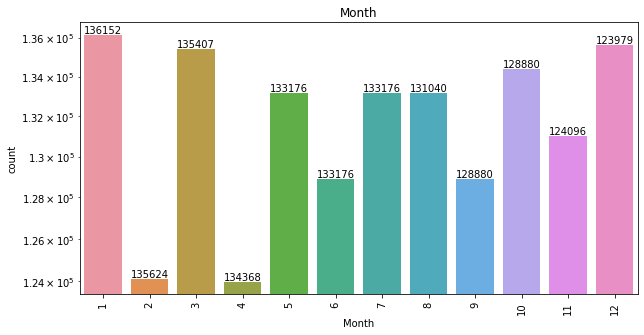

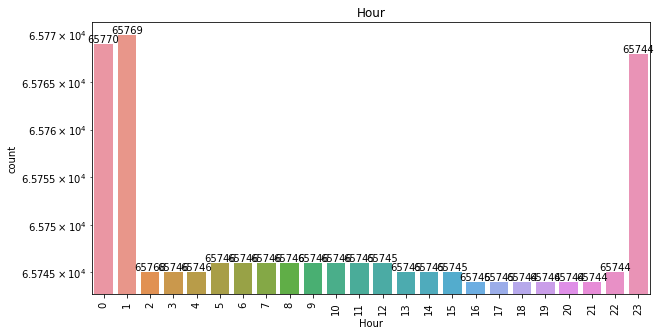

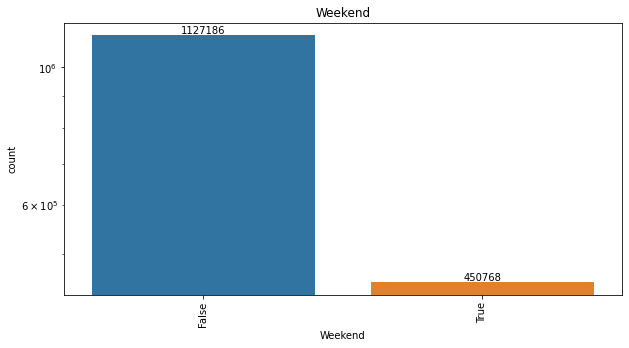

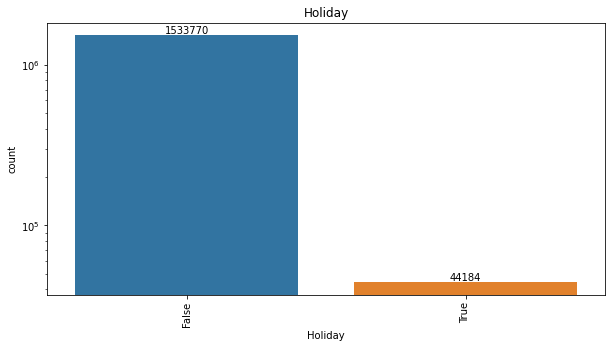

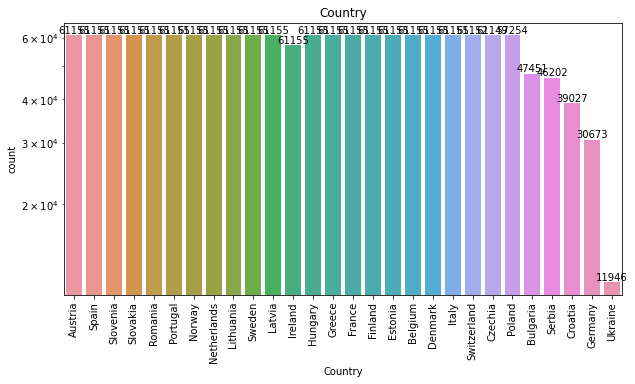

In [31]:
# create a count plot for the columns in for loop
# Countplot: histogram across a categorical (limited possible values), instead of quantitative, variable

for col in ['Year', 'Month', 'Hour','Weekend', 'Holiday','Country']:
    fig, ax = plt.subplots()
    fig.set_size_inches(10, 5)
    ax = sns.countplot(x=df[col])
    ax.set_yscale('log')
    abs_values = df[col].value_counts(ascending=False).values
    if(col == 'Dataset'):
        ax.bar_label(ax.containers[0], labels=abs_values,rotation=90)
    else:
        ax.bar_label(ax.containers[0], labels=abs_values)        
    plt.title(col)
    plt.xticks(x=abs_values, rotation=90)
    plt.show()

By creating a few countplots of our data, we make the following deductions:

- Some datasets do not have data for year 2015 and 2022, while most of them do for the years in between
- Months are not homogenously (weird)
- Most datasets have relatively the same amount of data from 7:00 am to 22:00 pm
- Most dates are business days
- Most datasets have the same amount of data exluding a few outliers

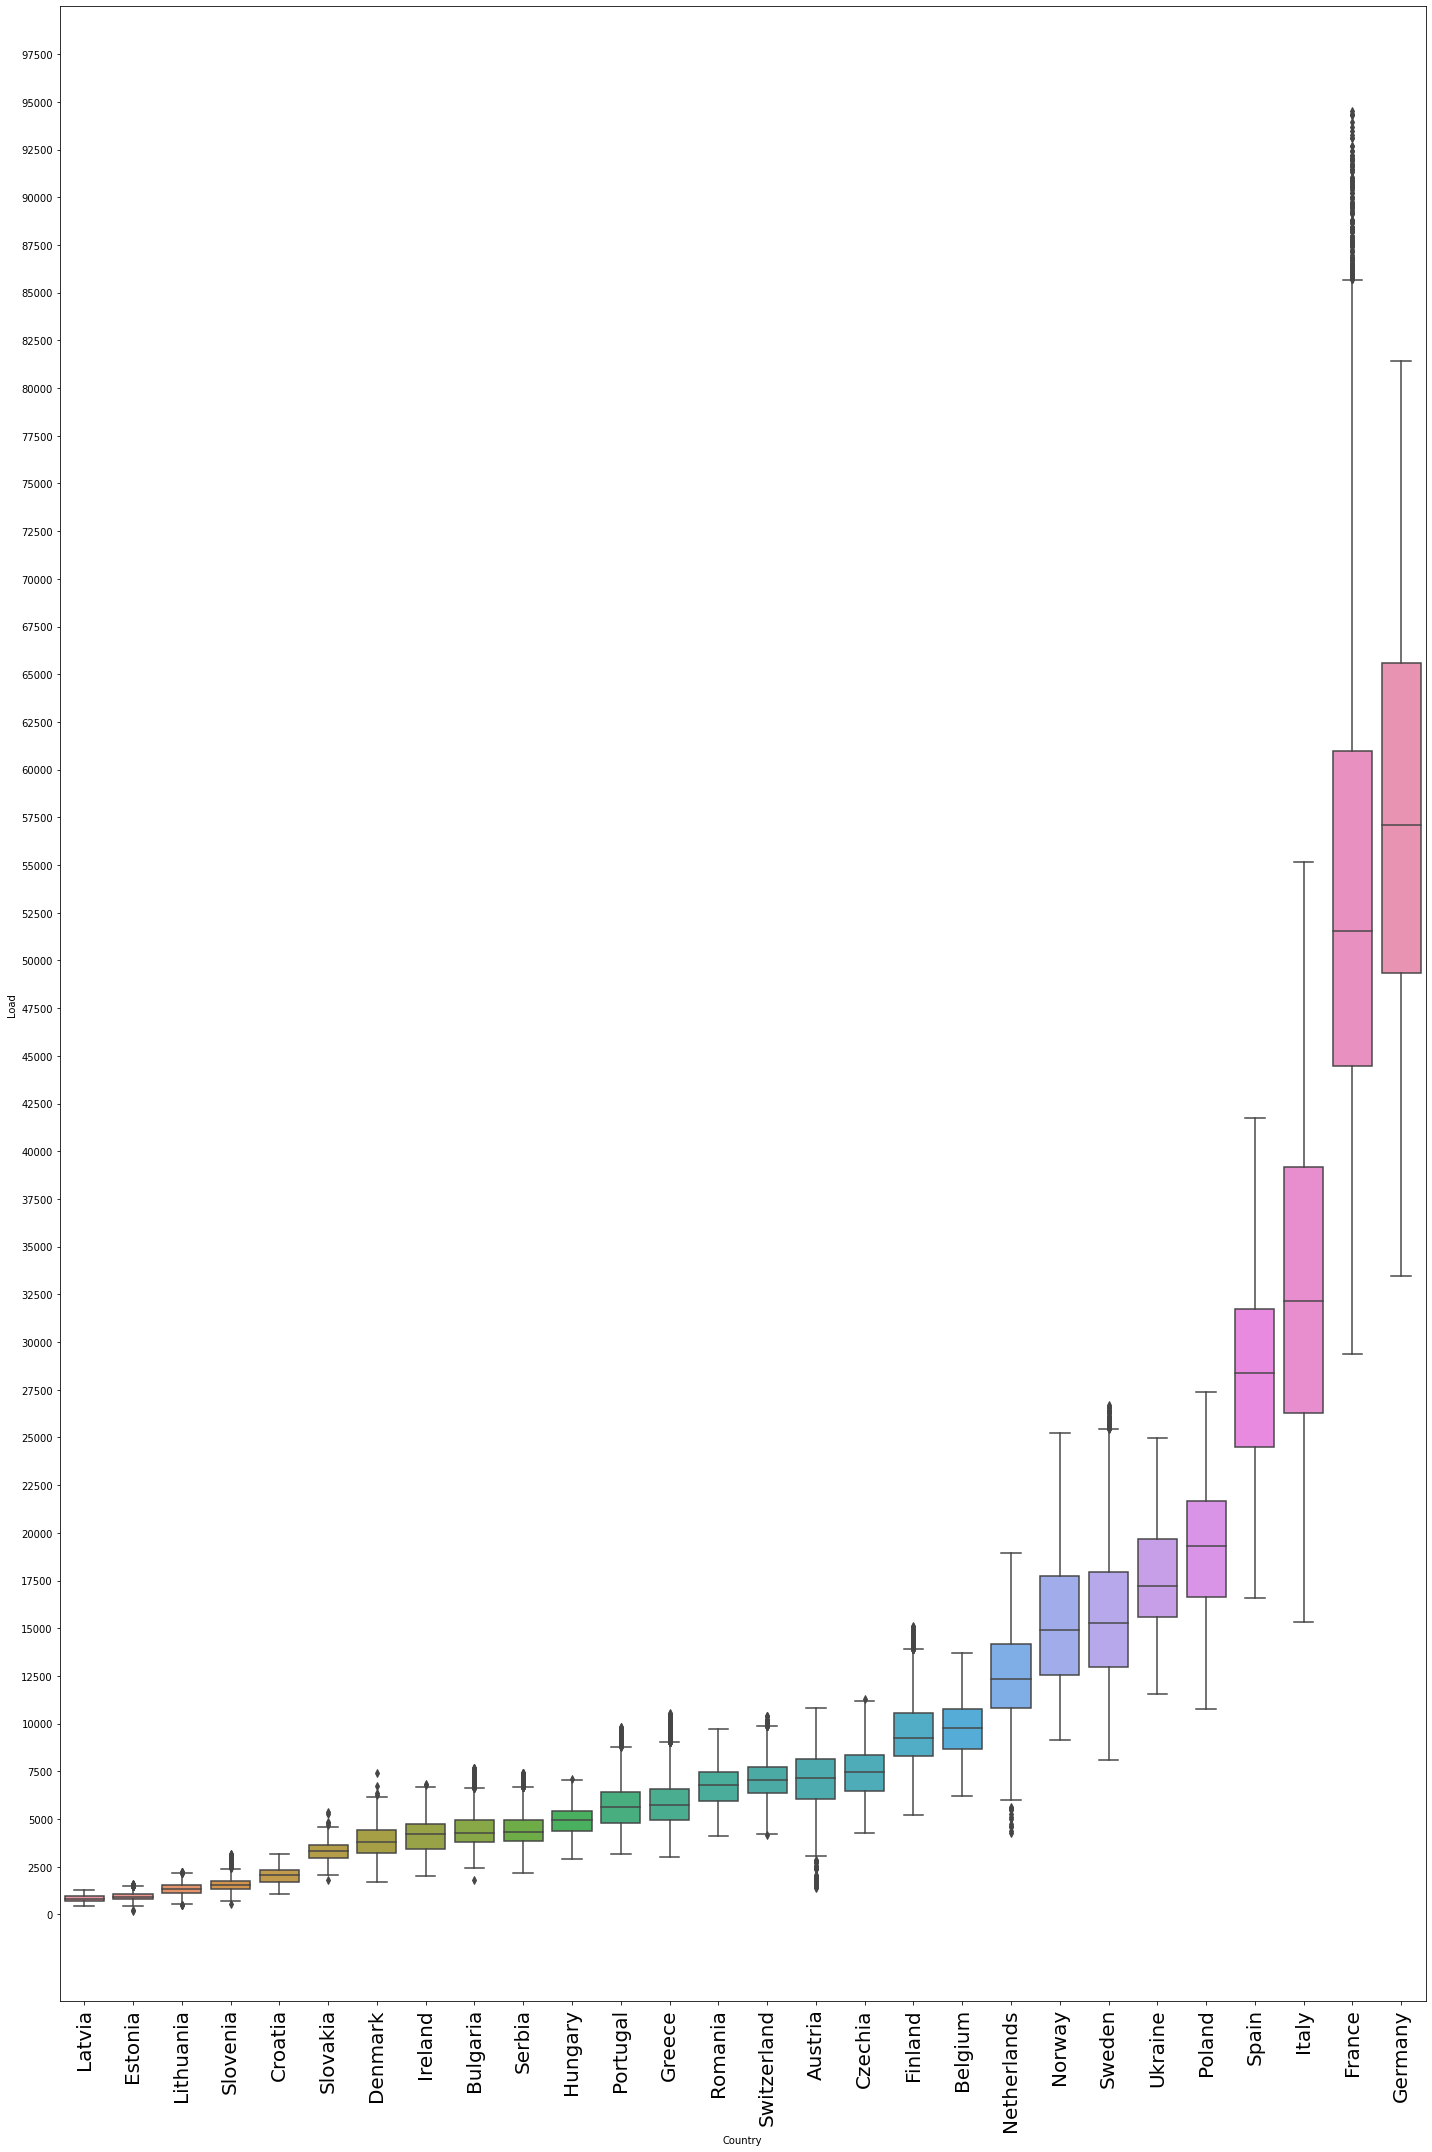

In [32]:
df_scaled = df[['Country', 'Load']].copy()

#group data by country and describe load data column
neighbouring_countries = df_scaled.groupby('Country')['Load'].describe()

# sort above description by mean value and create the list of countries produced by that sorting
neighbouring_countries = neighbouring_countries.sort_values(by=['mean']).index.get_level_values(0).to_list()

# use the country column as index and sort dataset by the list of countries sorted by mean
neighbour_df = df_scaled.set_index('Country').loc[neighbouring_countries]

neighbour_df.reset_index(inplace=True)
fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
ax = sns.boxplot(x='Country', y='Load', data=neighbour_df)
plt.xticks(fontsize=20, rotation=90)
plt.yticks(range(0,100000,2500))
plt.ylim(top=100000) 
plt.tight_layout()

In [33]:
# print the values displaye by boxplot in above cell
# set type as int to round numbers and remove decimal in order to take less print space
print( df_scaled.groupby('Country')['Load'].describe().sort_values(by=['mean']).round().astype(int)) 

             count   mean    std    min    25%    50%    75%    max
Country                                                            
Latvia       61155    822    168    436    682    824    951   1300
Estonia      61155    937    200    166    786    926   1072   1591
Lithuania    61061   1345    264    471   1133   1344   1543   2233
Slovenia     61155   1543    287    539   1315   1537   1754   3184
Croatia      39027   2041    388   1067   1716   2080   2337   3156
Slovakia     61155   3310    460   1830   2962   3314   3628   5359
Denmark      61155   3841    754   1693   3232   3824   4421   7398
Ireland      56572   4146    834   1994   3424   4221   4758   6835
Bulgaria     47259   4382    878   1803   3789   4265   4931   7690
Serbia       46202   4395    882   2168   3830   4342   4965   7429
Hungary      61155   4920    734   2928   4361   4970   5442   7116
Portugal     61155   5665    996   3160   4817   5635   6400   9833
Greece       61155   5800   1152   3010   4930  

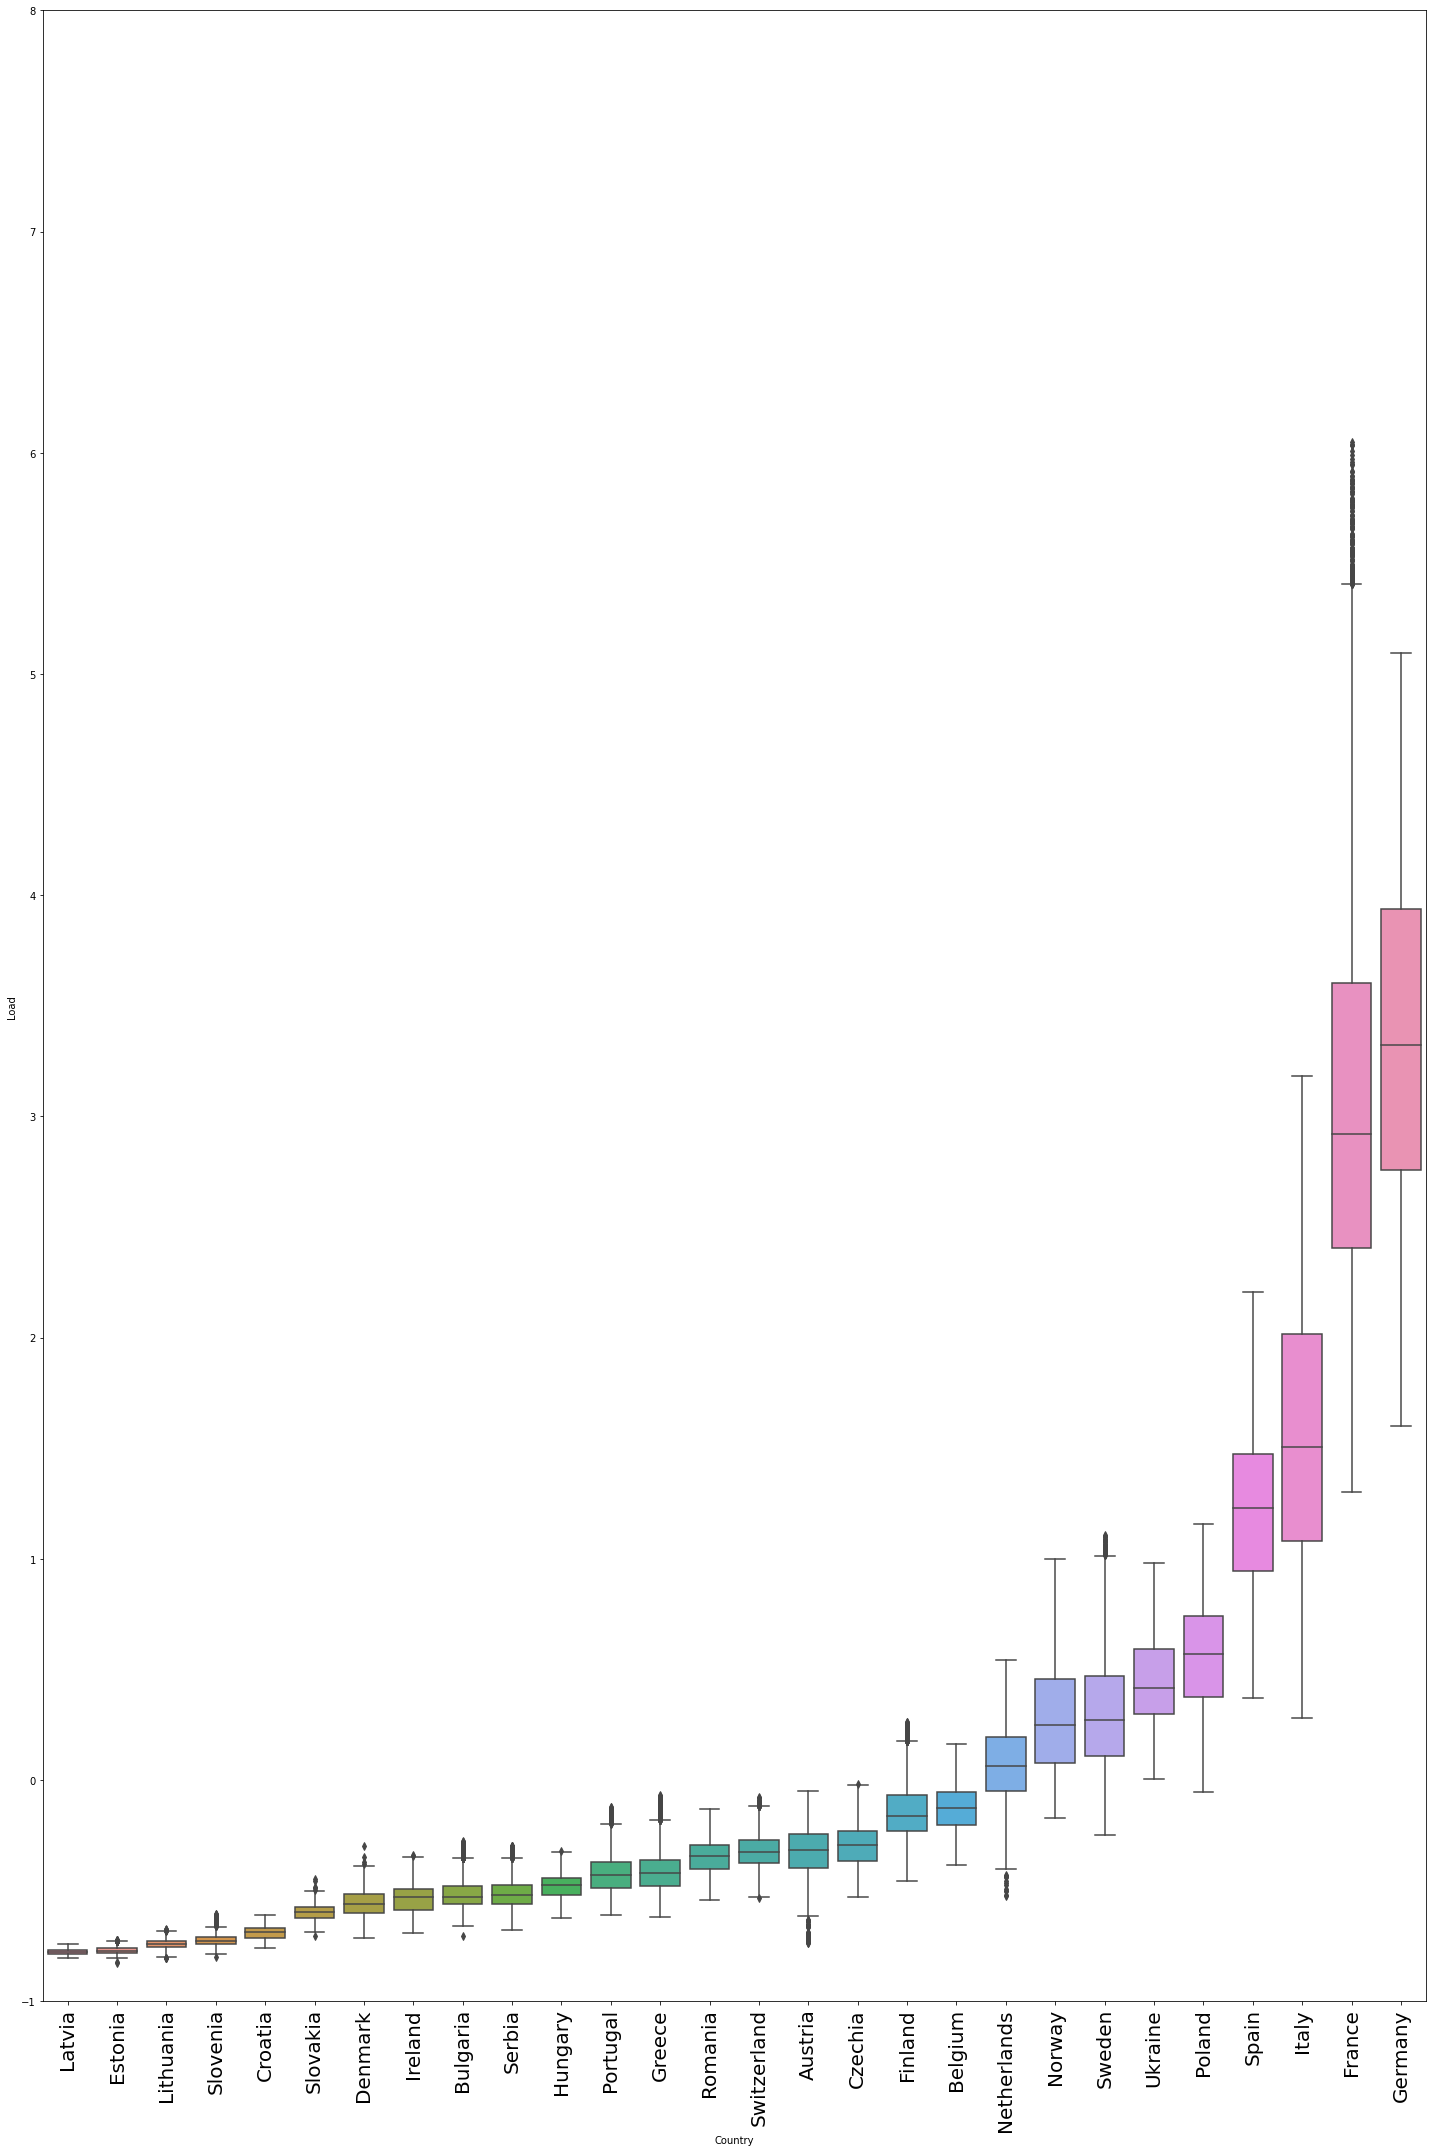

In [34]:
# Rescale Load column to 'force' boxplots to come closer together

from sklearn.preprocessing import StandardScaler

df_scaled = df[['Country', 'Load']].copy()

scaler = StandardScaler()
df_scaled['Load'] = scaler.fit_transform(df['Load'].values.reshape(-1,1))

neighbouring_countries = df_scaled.groupby('Country')['Load'].describe()
neighbouring_countries = neighbouring_countries.sort_values(by=['mean']).index.get_level_values(0).to_list()
neighbour_df = df_scaled.set_index('Country').loc[neighbouring_countries]

neighbour_df.reset_index(inplace=True)

fig, ax = plt.subplots()
fig.set_size_inches(20, 30)
plt.ylim(-1, 5)
ax = sns.boxplot(x='Country', y='Load', data=neighbour_df)
plt.xticks(fontsize=20, rotation=90)

plt.ylim(top=8) #set to different values to zoom in/out 

plt.tight_layout()

We can conclude that the amount of energy demand is determined by a country's:
- Population
- maintenance and productivity

From that box plot we can see visually which datasets have similar values and their variance, which will be used to determine which ones are going to be grouped together (source) to forecast values of a target with similar values
Also, we can easily group countries with similar distribution of energy demand
By sorting them in increasing order:
- Latvia - Estonia
- Lithuania - Slovenia
- Denmark - Croatia
- Ireland - Bulgaria - Serbia (- Hungary)
- Portugal - Greece
- Romania - Switcherland - Austria - Czech Republic
- Finland - Belgium
- (France - Germany)?

Text(0.5, 1.0, 'zoom')

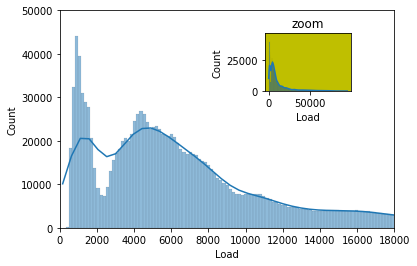

In [35]:
fig, ax = plt.subplots()
sns.histplot(data=df['Load'], kde=True)
plt.xlim(0, 18000)
plt.ylim(0, 50000)

ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='y')
sns.histplot(data=df['Load'], kde=True, ax=ax2)
ax2.set_title('zoom')
# ax2.set_xlim(right=50000)

In [36]:
df['Load'].autocorr(lag=365*48)

0.010754141508302418

(0.0, 10000.0)

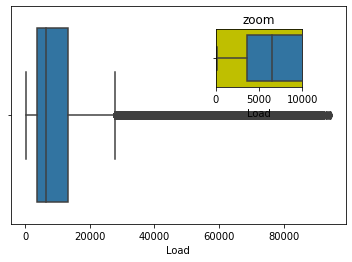

In [37]:
fig, ax = plt.subplots()
ax = sns.boxplot(x=df['Load'])
ax2 = plt.axes([0.6, 0.6, .2, .2], facecolor='y')
sns.boxplot(x=df['Load'], ax=ax2)
ax2.set_title('zoom')
ax2.set_xlim([0,10000])

Judging from the box plot, we can see a lot of outlier values ranging from 2000 to 10.000

That is a good indicator that most large loads are actually diviation from the usual load distribution
(spikes in power consumtion)

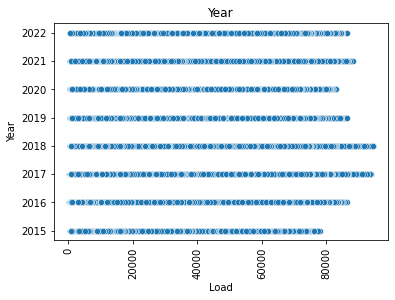

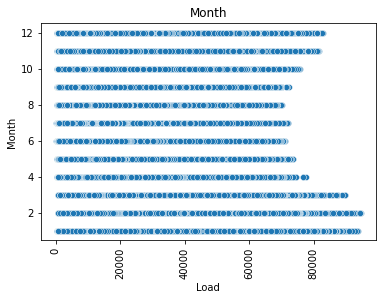

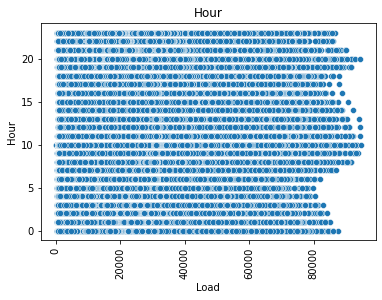

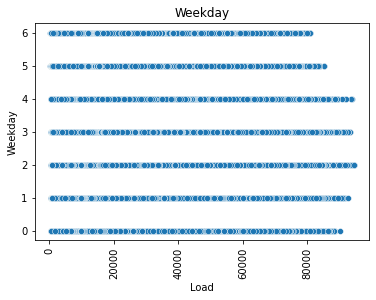

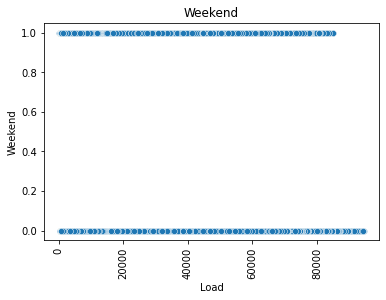

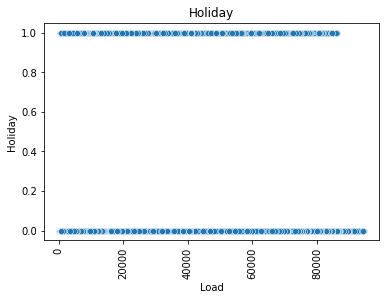

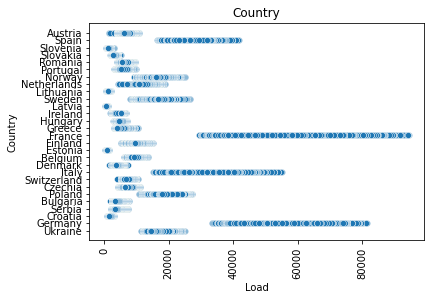

In [38]:
for col in ['Year', 'Month', 'Hour', 'Weekday', 'Weekend', 'Holiday', 'Country']:
    sns.scatterplot(x=df['Load'], y=df[col])
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()

From scatterplots not much further can be deduced

<AxesSubplot:xlabel='Holiday'>

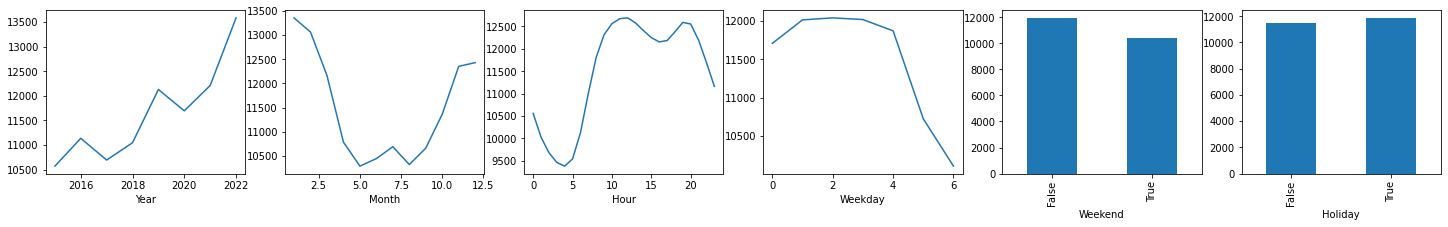

In [39]:
fig, axes = plt.subplots(1, 6)
df.groupby('Year')['Load'].mean().plot(ax=axes[0], figsize=(25, 3))
df.groupby('Month')['Load'].mean().plot(ax=axes[1], figsize=(25, 3))
df.groupby('Hour')['Load'].mean().plot(ax=axes[2], figsize=(25, 4))
df.groupby('Weekday')['Load'].mean().plot(ax=axes[3], figsize=(25, 3))
df.groupby('Weekend')['Load'].mean().plot.bar(ax=axes[4], figsize=(25, 3))
df.groupby('Holiday')['Load'].mean().plot.bar(ax=axes[5], figsize=(25, 3))

We group load based based on a specific variable (x-axis) and plot the mean value

From those graphs we can deduce:
- A upward trend (as year increases, load increases)
- An increase in load demand from September till December and a steady dicrease from January till May (winter months)
- An increase in load demand on business hours (with a slight drop at noon) and proper drop as night approaches
- Load is greater at business days (with significant difference between weekends and not that variant of holidays)

In [40]:
# from darts.utils.statistics import check_seasonality, plot_acf, plot_residuals_analysis
# from darts.metrics import mape, mase
# from darts import TimeSeries

# df['Start'] = pd.to_datetime(df['Start']).dt.tz_localize(None)
# series = TimeSeries.from_dataframe(df, time_col='Start', 
#                                    value_cols='Load', 
#                                    fill_missing_dates=True, freq='15T')
# series

Loading dataset: Austria


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


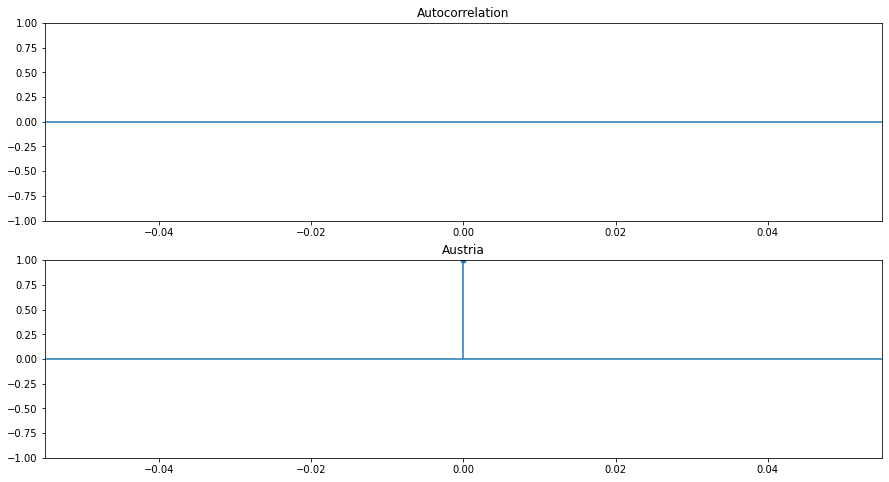

Loading dataset: Belgium


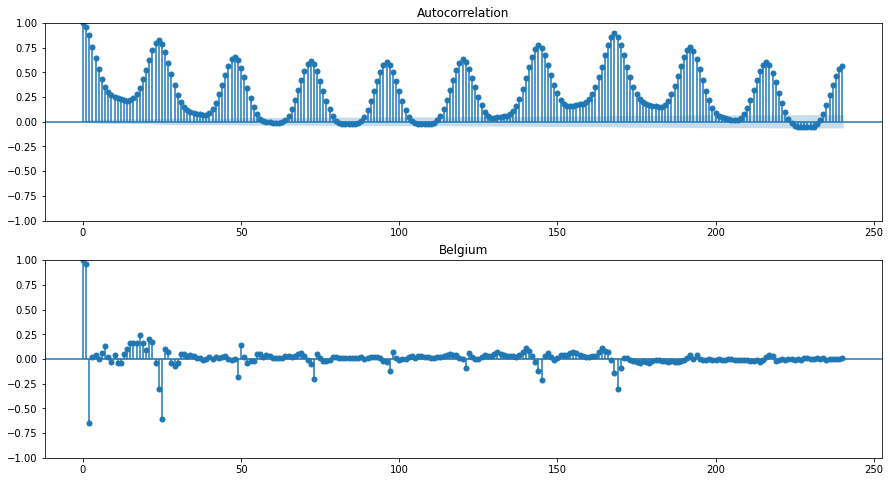

Loading dataset: Bulgaria


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


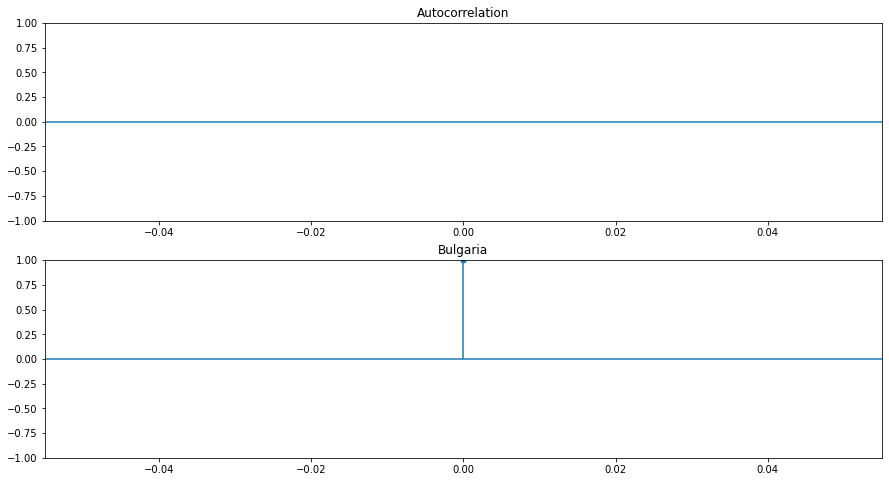

Loading dataset: Croatia


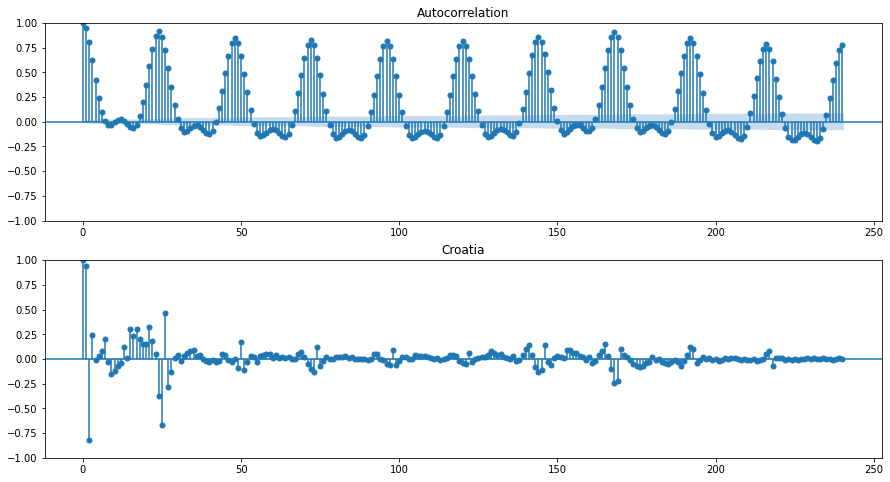

Loading dataset: Czechia


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


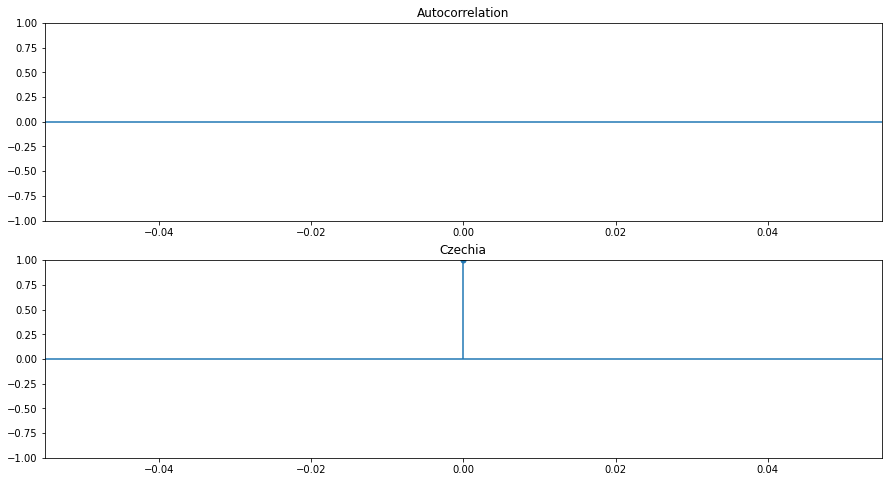

Loading dataset: Denmark


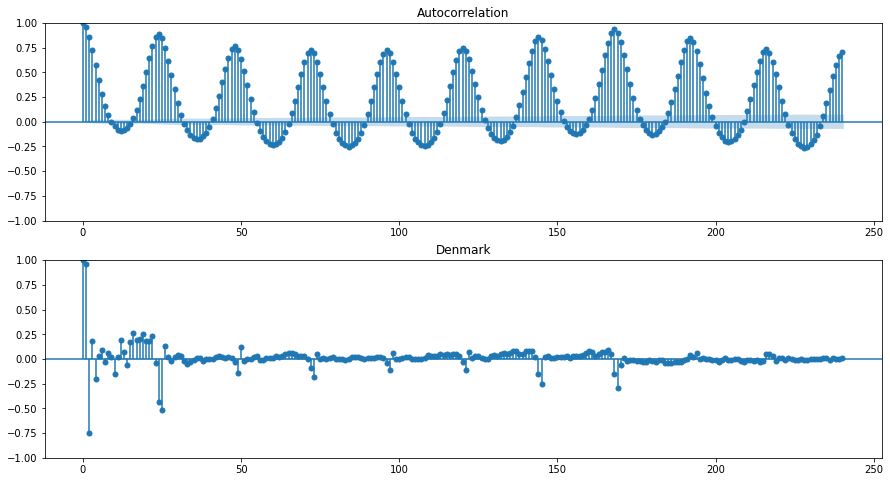

Loading dataset: Estonia


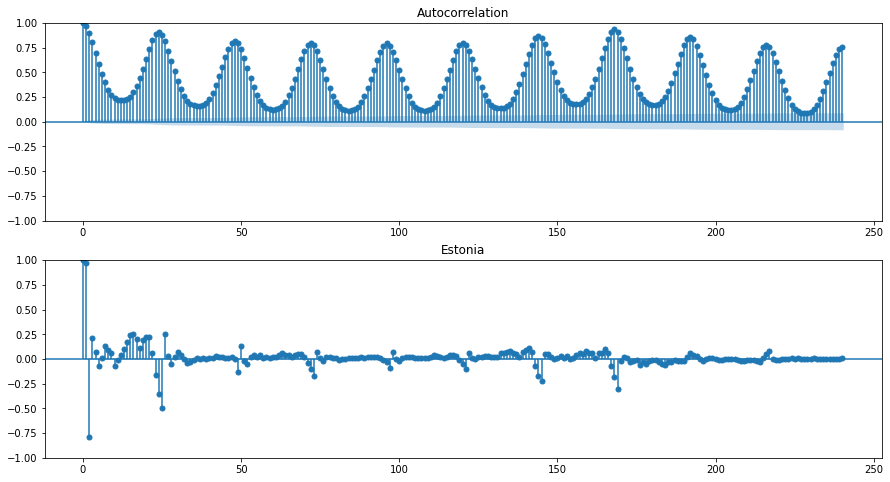

Loading dataset: Finland


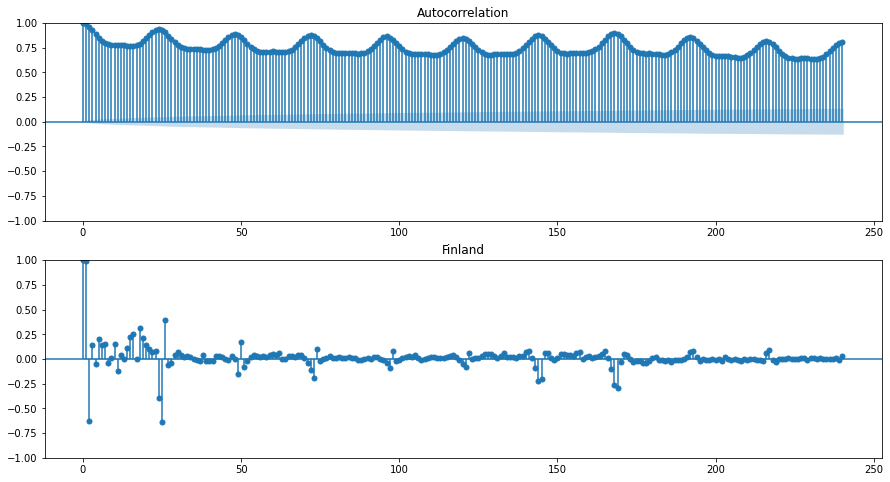

Loading dataset: France


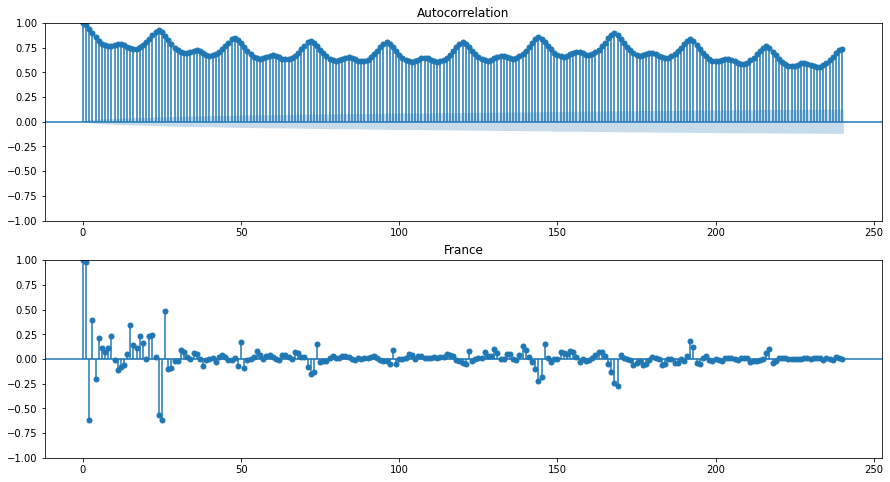

Loading dataset: Germany


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


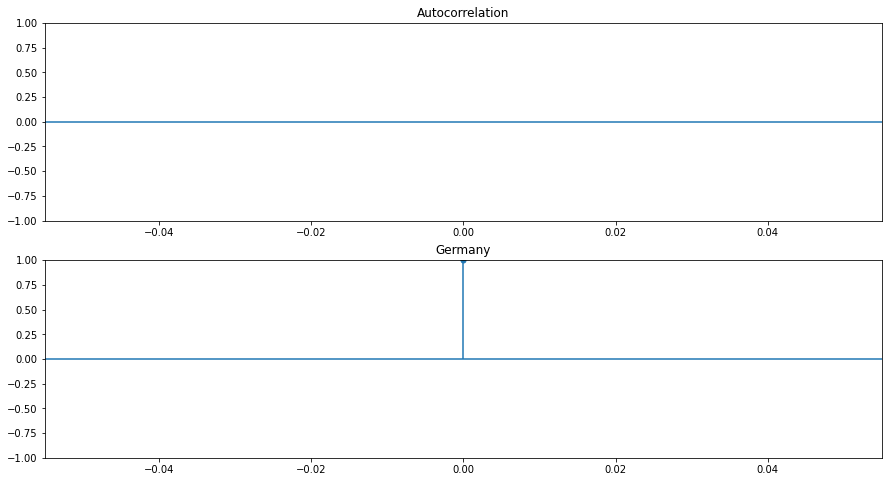

Loading dataset: Greece


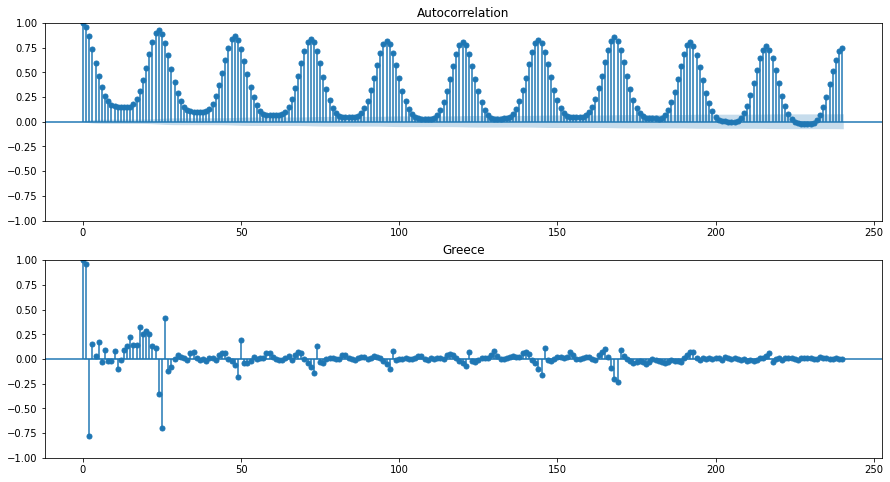

Loading dataset: Hungary


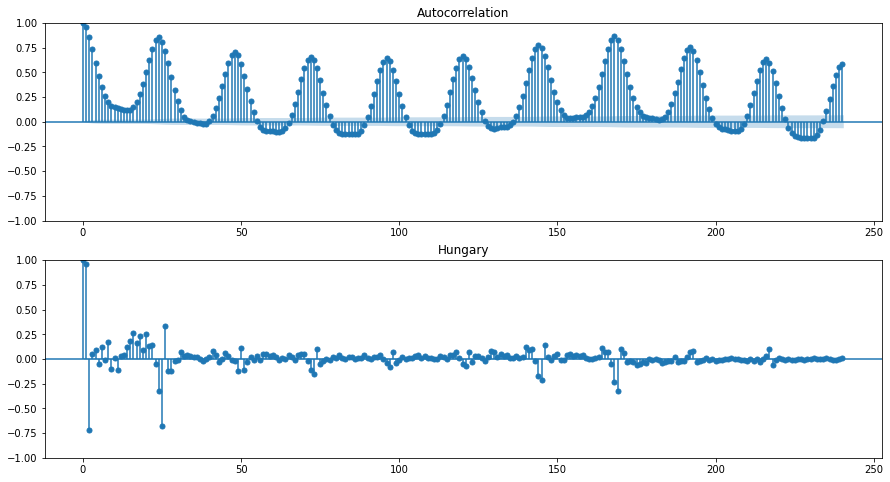

Loading dataset: Ireland


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


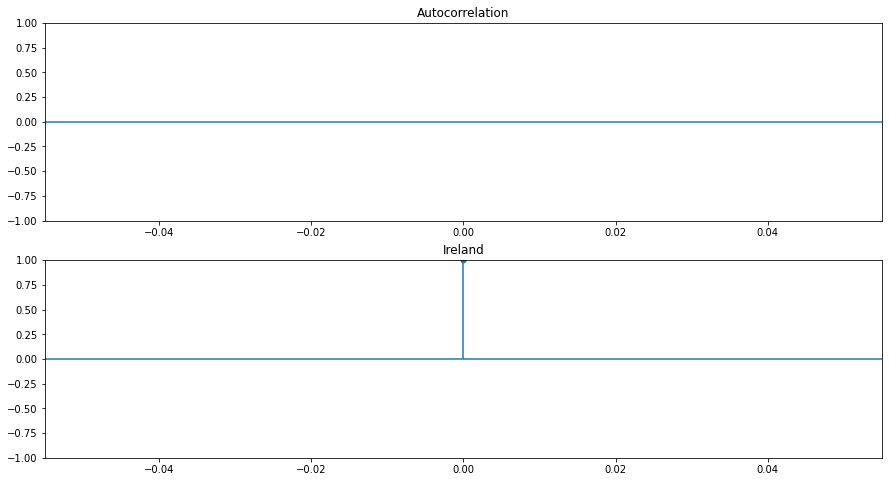

Loading dataset: Italy


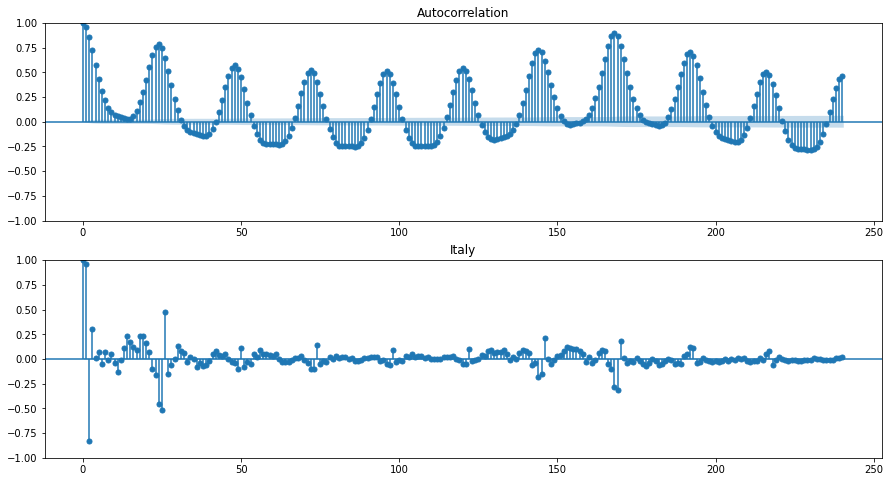

Loading dataset: Latvia


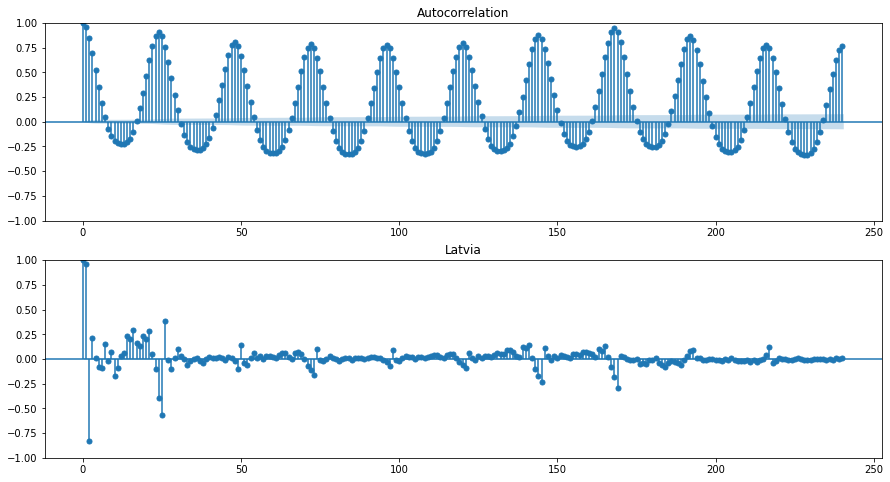

Loading dataset: Lithuania


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


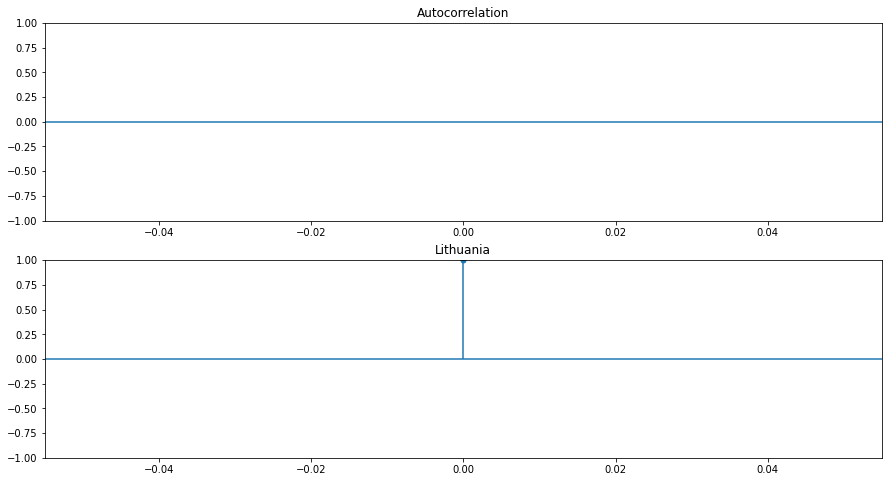

Loading dataset: Netherlands


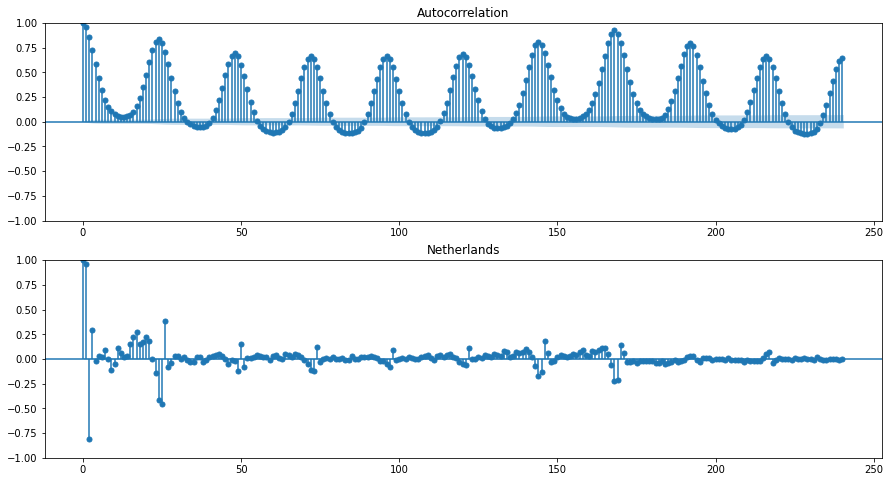

Loading dataset: Norway


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


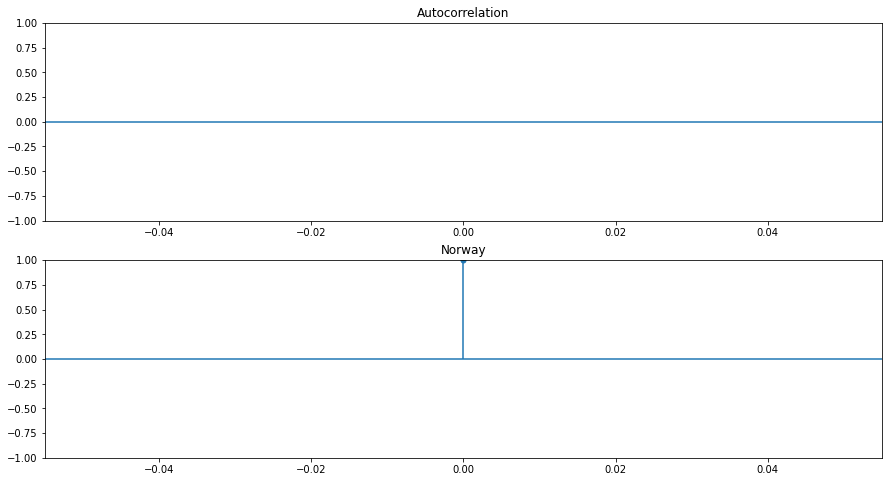

Loading dataset: Poland


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


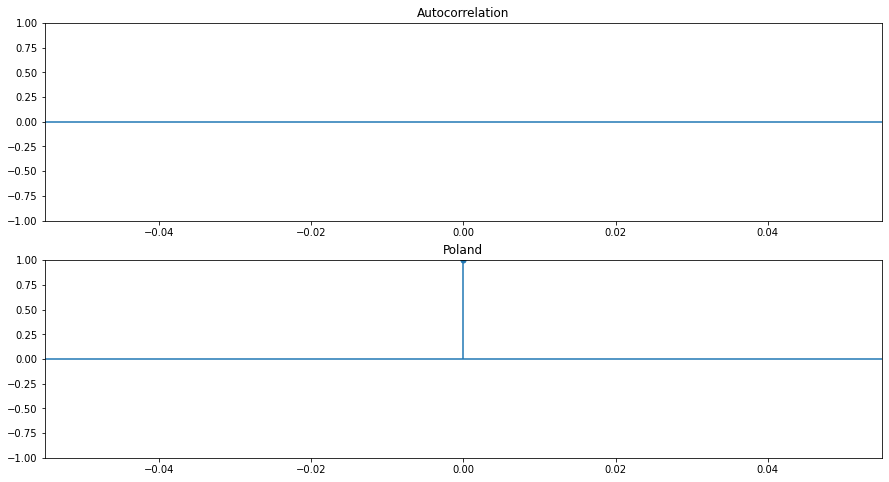

Loading dataset: Portugal


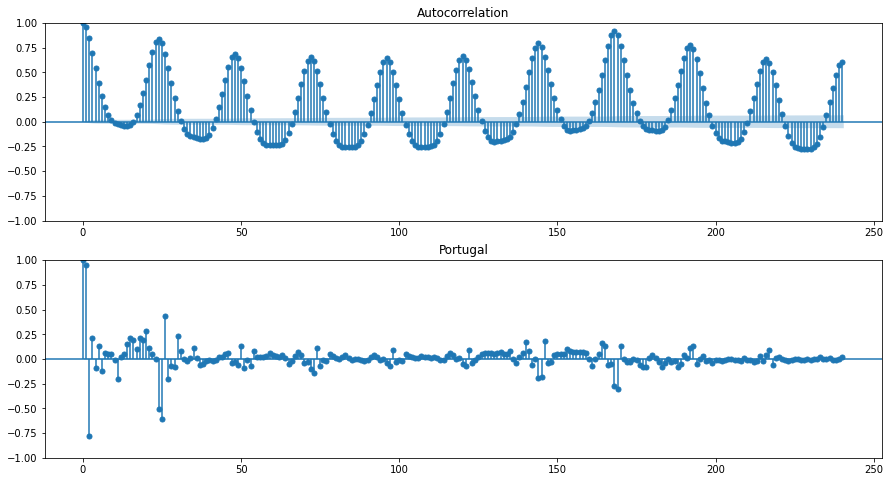

Loading dataset: Romania


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


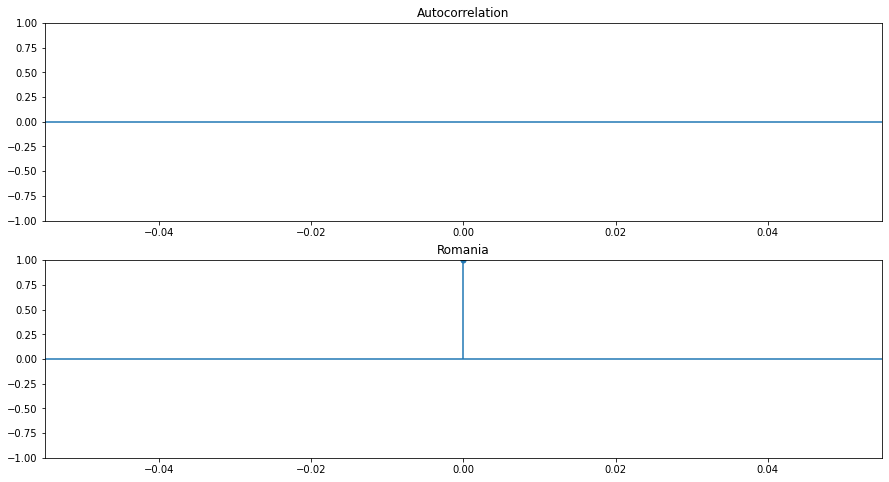

Loading dataset: Serbia


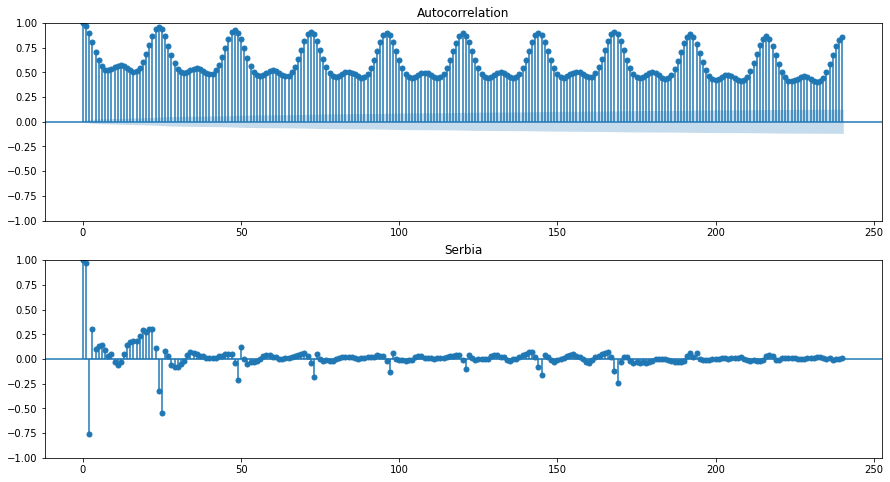

Loading dataset: Slovakia


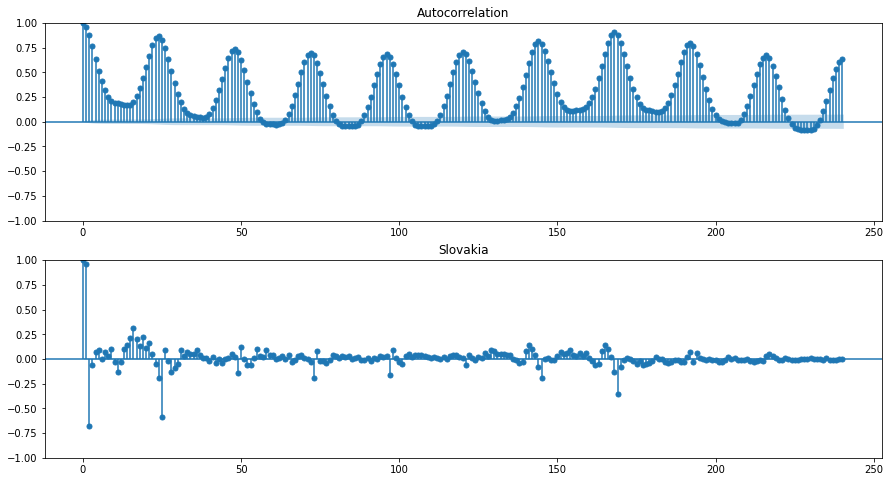

Loading dataset: Slovenia


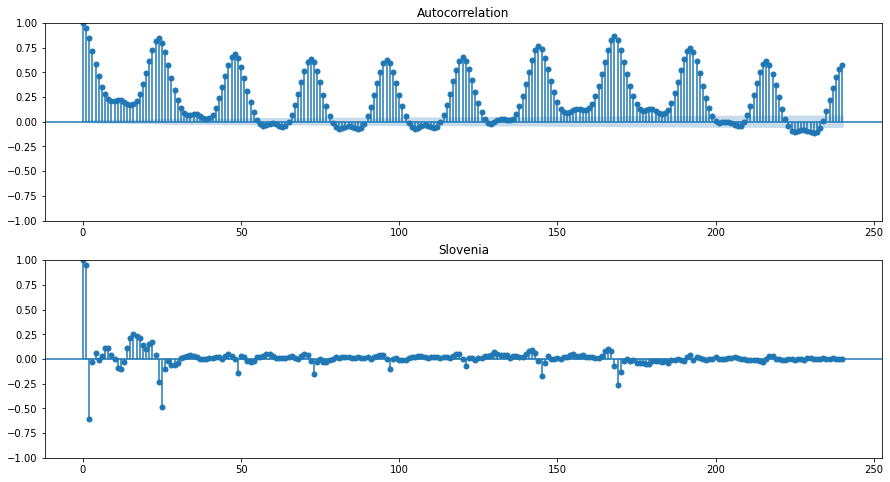

Loading dataset: Spain


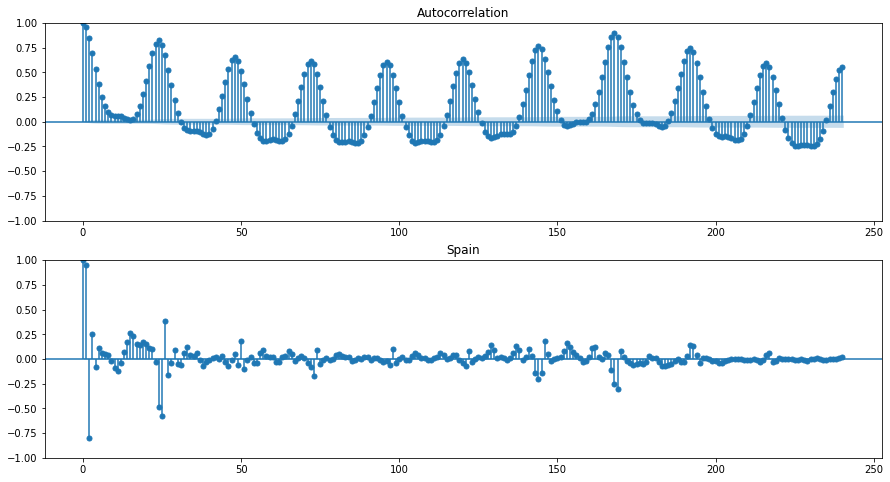

Loading dataset: Sweden


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


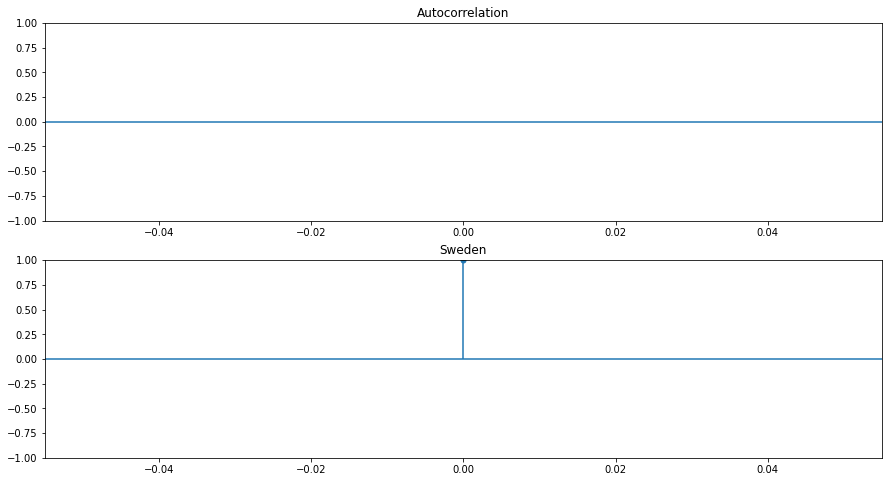

Loading dataset: Switzerland


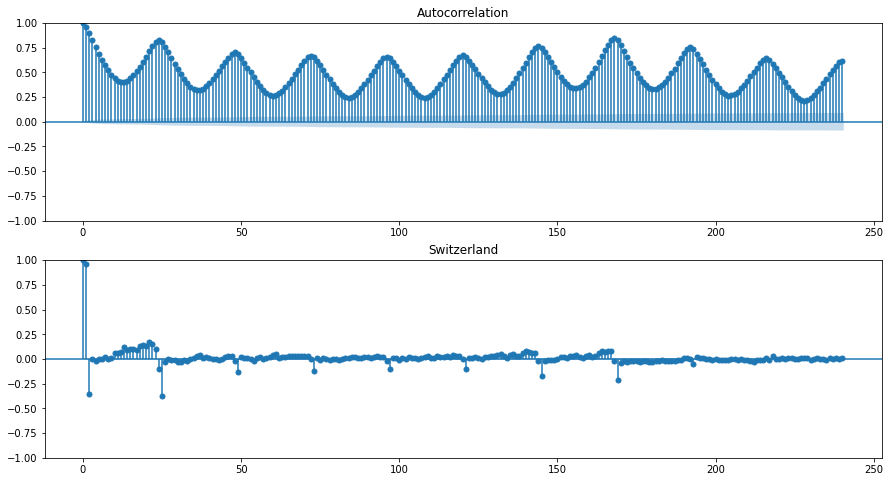

Loading dataset: Ukraine


c:\users\tzort\appdata\local\programs\python\python38\lib\site-packages\matplotlib\axes\_base.py:2480: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


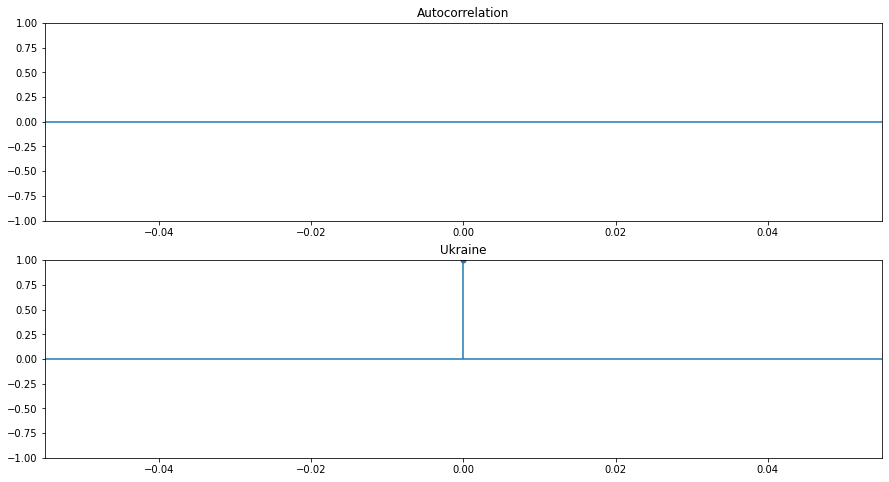

In [47]:
import statsmodels.api as sm

# cannot do it with the entire dataset, so i have to do it for each dataset individually
for csv in pathlib.Path('./Temp Load Data/').glob('*.csv'):
    print("Loading dataset: "+csv.stem)
    temp_df = pd.read_csv(csv, index_col=0, parse_dates=['Date'], date_parser=dateparse)
    fig, ax = plt.subplots(2,1, figsize=(15, 8))
    fig = sm.graphics.tsa.plot_acf(temp_df['Load'], lags=24*10, ax=ax[0])
    fig = sm.graphics.tsa.plot_pacf(temp_df['Load'], lags=24*10, ax=ax[1],method='ywm')
    plt.title(csv.stem)
    plt.show()

In [49]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib as mpl

mpl.rcParams['agg.path.chunksize'] = 10000

df_seasonal = df.set_index('Date') #set as index of dataset the datetime column

# 365 days + 48 half-hours of 41 out of 42 datasets (+ similar for the 1st dataset every 15 min)
result = seasonal_decompose(df_seasonal['Load'],  model='additive', period=365*48*41+365*48*2)

f = result.plot()
f.set_figheight(15)
f.set_figwidth(25)
plt.show()

ValueError: This function does not handle missing values

Not much can be deduced other than the fact that there is indeed a seasonal and increasing trend along time axis 

<AxesSubplot:>

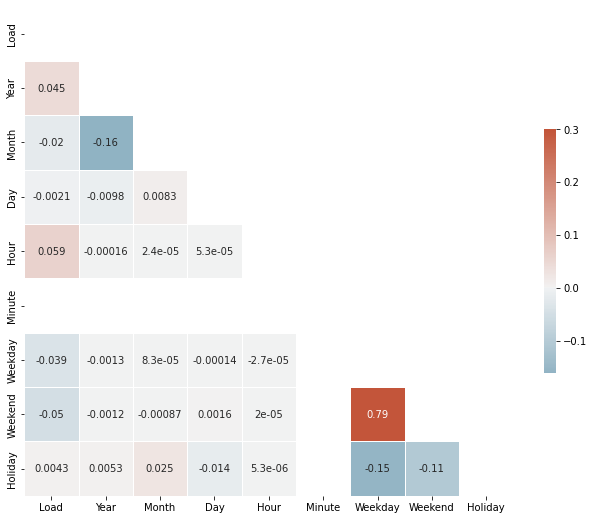

In [43]:
import numpy as np
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True,annot=True, linewidths=.5, cbar_kws={"shrink": .5})

In [54]:
# When we run this cell the report process will be kicked off and 
# analyse all of your data within the dataframe

# https://towardsdatascience.com/pandas-profiling-easy-exploratory-data-analysis-in-python-65d6d0e23650
from pandas_profiling import ProfileReport

report = ProfileReport(df)
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [44]:
pivot_df = df.pivot_table('Load', ['Date'], 'Country')

# sort columns based on ascending order of mean value per country (see boxplots above)
pivot_df = pivot_df.reindex(columns=neighbouring_countries)

# naive imputation
# pivot_df.fillna(0, inplace=True)
# pivot_df.interpolate()

# Use if no custom imputation
# pivot_df.fillna(method="bfill", inplace=True)
# pivot_df.fillna(method="ffill", inplace=True)

print('NaN left in pivot table?: '+str(pivot_df.isnull().values.any()))

NaN left in pivot table?: True


In [45]:
pivot_df.head()

Country              Latvia  Estonia  Lithuania  Slovenia  Croatia  Slovakia  \
Date                                                                           
2015-04-09 23:00:00   661.0    787.0      967.0    1296.0      NaN    3081.0   
2015-04-10 00:00:00   622.0    754.0      930.0    1190.0      NaN    2964.0   
2015-04-10 01:00:00   600.0    735.0      907.0    1166.0      NaN    2856.0   
2015-04-10 02:00:00   596.0    729.0      899.0    1150.0      NaN    2798.0   
2015-04-10 03:00:00   606.0    733.0      903.0    1143.0      NaN    2811.0   

Country              Denmark  Ireland  Bulgaria  Serbia  ...  Belgium  \
Date                                                     ...            
2015-04-09 23:00:00   3225.0   4325.0       NaN     NaN  ...  10797.0   
2015-04-10 00:00:00   2977.0   3778.0       NaN     NaN  ...  10141.0   
2015-04-10 01:00:00   2861.0   3376.0       NaN     NaN  ...   9462.0   
2015-04-10 02:00:00   2827.0   3165.0       NaN     NaN  ...   8995.0   
2015-04-10 03:00:00   2846.0   2977.0       NaN     NaN  ...   8890.0   

Country              Netherlands   Norway   Sweden  Ukraine  Poland    Spain  \
Date                                                                           
2015-04-09 23:00:00      10461.0  14217.0  14988.0      NaN     NaN  27602.0   
2015-04-10 00:00:00       9372.0  13640.0  13991.0      NaN     NaN  25497.0   
2015-04-10 01:00:00       8569.0  13468.0  13536.0      NaN     NaN  23651.0   
2015-04-10 02:00:00       8184.0  13335.0  13133.0      NaN     NaN  22638.0   
2015-04-10 03:00:00       7985.0  13219.0  13218.0      NaN     NaN  22291.0   

Country                Italy   France  Germany  
Date                                            
2015-04-09 23:00:00  30400.0  54326.0      NaN  
2015-04-10 00:00:00  27148.0  51467.0      NaN  
2015-04-10 01:00:00  25257.0  49029.0      NaN  
2015-04-10 02:00:00  24309.0  47860.0      NaN  
2015-04-10 03:00:00  23802.0  45388.0      NaN  

[5 rows x 28 columns]

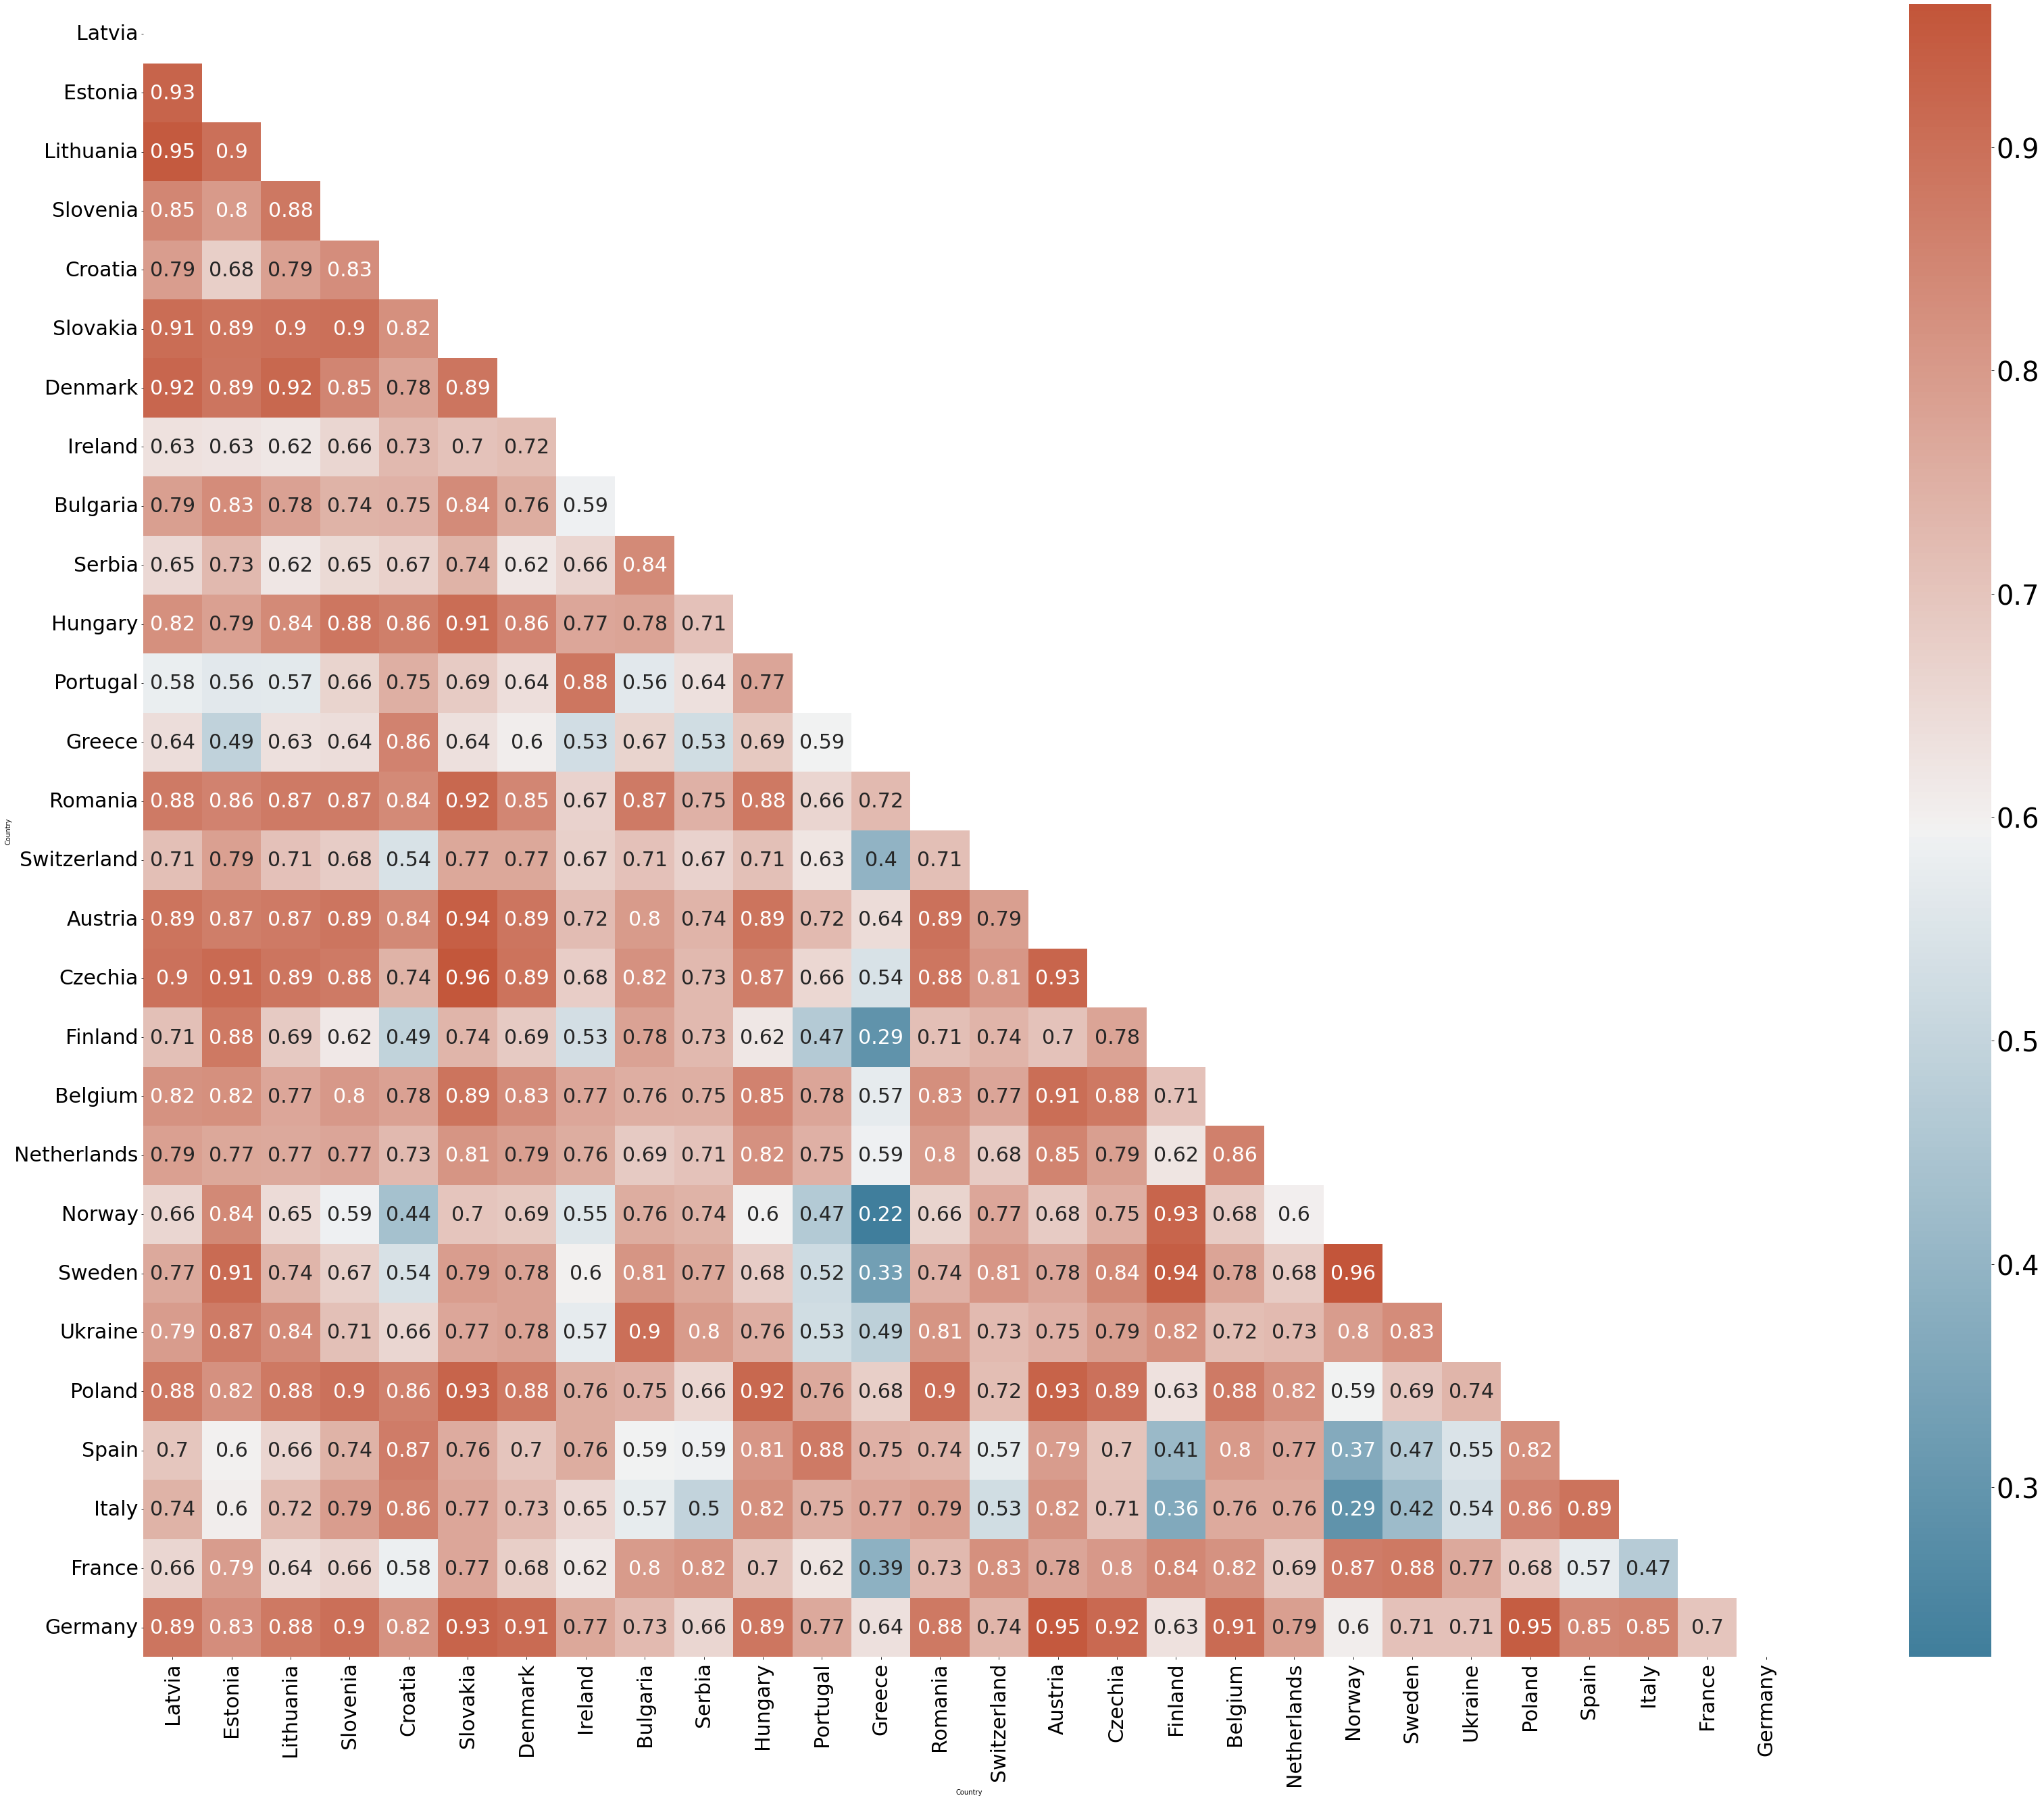

In [53]:
import numpy as np

# Compute the correlation matrix (excluding NA/null values)
corr = pivot_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(60, 45))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
cmap.set_bad('w') # default value is 'k'

# Draw the heatmap with the mask and correct aspect ratio
res = sns.heatmap(corr, mask=mask, cmap=cmap, square=True, annot=True, 
                  annot_kws={"size": 30}, ax=ax)

# size of country names
res.set_xticklabels(res.get_xmajorticklabels(), fontsize = 30, rotation = 90)
res.set_yticklabels(res.get_ymajorticklabels(), fontsize = 30, rotation = 0); # ";" to supress print in cell

# change font size of heatmap colourbar
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=40)


In [55]:
pivot_report = ProfileReport(pivot_df
                             #, minimal=True
                            )
pivot_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]